# Hypothesis Testing and Difference Parameters

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm

## <u>Case Study 1</u>: Colleges and Universities (continued)


- the number of students enrolled full-time (`FT_ENROLL`)
- the number of students enrolled part-time (`PT_ENROLL`)
- the number of people employeed by the school (`TOT_EMPLOY`)

## 1. Read in the data 

Below, you should read in the data from the **colleges.csv** file, perform any cleaning that needs to take place, and create the following variable:

- the variable `majority_pt`, a logical (Boolean) variable that indicates if the college or university has more students enrolled part-time than full-time (using `FT_ENROLL` and `PT_ENROLL`)

**Hint:** For the data cleaning, you may follow the process from Homework 7.  Check the Homework 7 solutions for an example of how to clean the data based on reasonable values for the `TOT_ENROLL` variable.

In [28]:
colleges = pd.read_csv('colleges.csv')
colleges = colleges [(colleges['TOT_ENROLL']> 0)]
colleges = colleges.reset_index()

In [29]:
def bool(row):
    if row['PT_ENROLL'] > row['FT_ENROLL']:
        return True
    else:
        return False
    
colleges['majority_pt'] = colleges.apply(bool, axis=1)
print(colleges['majority_pt'])

0      False
1       True
2      False
3      False
4       True
       ...  
123    False
124    False
125    False
126    False
127     True
Name: majority_pt, Length: 128, dtype: bool


## 2. What Population Does a College Serve? 

The University of Illinois reports that approximately 15% of students enrolled part-time.  

A university diversity officer would like to see if that 15% is also a reasonable value for a different characteristic of colleges and universities: the proportion of colleges that serve a majority of part-time students (as opposed to full-time students).

**a)**  Write out our hypotheses to test in this question.  Be sure to use appropriate notation, and define our parameter of interest.

$H_0: p=0.15$

$H_A: p\neq0.15$

our parameter of interest : p (= the proportion of colleges that serve a majority of part-time students as opposed to full-time students.)

**b)** Check whether the conditions are met for our hypothesis test to be valid.  (No need to state each condition, but you may if it helps you.)

**Note:** you may continue your analysis as if these conditions were met, even if they are not.

In [30]:
# 1. Because the sample is collected via random sampling and n = 128 < 10% of all US colleges and universities, the observations are independent. 
# 2. If we plug in null p value (0.15) into np and n(1-p), both values meet the condition. 
n = 128
p = 0.15
print(n*p>=10)
print(n*(1-p)>=10)

True
True


The CLT conditions for sample proportions are met for our hypothesis test to be valid. 

**c)** Calculate the test statistic and corresponding *p*-value for this test.

In [31]:
estimate = (colleges['majority_pt'] == True).mean()
std_err = np.sqrt(p * (1-p) / n)
test_statistic = (estimate - p) / std_err
pvalue = 2 * (1-norm.cdf(test_statistic))
print('t-statistic:', test_statistic)
print ('p-value:',pvalue)

t-statistic: 1.6832508230603465
p-value: 0.09232654595631029


**d)** Based on your hypothesis test results, what **decision** would you make about our hypotheses at a significance level of $0.10$?

Since my p-value (0.0923) is smaller than significance level: 0.10, I would reject the null hypothesis. 

**e)**  Which of the following statements is correct about what our significance level represents?

- Statement 1: The significance level is the probability that the null hypothesis is true.
- Statement 2: The significance level is the probability of getting a test statistic as extreme or more extreme than observed, assuming the null hypothesis is true.
- Statement 3: The significance level is the proportion of experiments that we would reject the null hypothesis when the null hypothesis is true.
- Statement 4: The significance level is the proportion of times that the alternative hypothesis is true.

**Replace the X with a number below.**

Statement 2  is correct.

## 3. College and University Employees 
Because many colleges are small, I believe that the average number of employees of all post-secondary educational facilities (schools) will be less than 481 people.  I want to make a decision about this claim using data.  Help me to perform an appropriate hypothesis test to test my theories.

For this question, I'll use a significance level of $\alpha = 0.01$.

**a)** Write out your hypotheses.  Be sure to use appropriate notation and to define the parameter of interest.

$H_0: \mu=481$.

$H_A: \mu < 481$.

Where $\mu=$ the average number of employees of all post-secondary facilities(schools)

**b)** State & check the necessary assumptions for the hypothesis test to be valid.  

The observations are independent because the sample is collected via random sampling and $n<10\%$ of the population of ALL post-secondary facilities in U.S.

Also, n > 30. Therefore the sampling distribution meets CLT theorem conditions for sample mean and the hypothesis test will be valid.

**c)** Calculate the test statistic and corresponding *p*-value based on the provided sample of colleges.

In [32]:
test_stat = ( colleges['TOT_EMPLOY'].mean() - 481 ) / (colleges['TOT_EMPLOY'].std() / np.sqrt(128))
test_stat

-0.4578950395128658

In [33]:
p_value = 1 - t.cdf(np.abs(test_stat), df = 127)
p_value

0.3239051588757882

**d)** Based on the evidence calculated so far, what can you say about our theory of interest?  Be sure to give a complete conclusion in the context of the problem.

p-value is 0.324, which is larger than significance level alpha(0.01). 

Therefore, I fail to reject my null hypothesis: $H_0: \mu=481$.

This concludes that my belief that the average number of employees of all post-secondary educational facilities(schools) would be less than 481 people is not convincing. 

**e)** Interpret the *p*-value.  That is, explain what the specific *p*-value that you calculated means.

The p-value is 0.3247, which means the probability of generating a sample similar to or more unusual than the one we got if the null hypothesis is true is 32.47%. 

<hr>

## <u>Case Study 2</u>: U.S. County Unemployment Rate and Metropolitan Areas

In this case study, we will explore the statistical concepts that we've learned this week while also exploring the relationship between the **unemployment rate** of U.S. counties and whether the county is a **metropolitan area** or not. In this analysis, our cleaned U.S. counties dataset will serve as our population of all U.S. counties.  Other than those counties that have been removed, this dataset is in fact the population of U.S. coutnies.  While we usually do not have the whole population at our disposal when we conduct inference, we will use this population to "check" our answers so we can gain a deeper understanding of what is going on "behind the scenes" when we conduct inference on a population parameter.

## 4. Read and prepare the data 

We will be analyzing just the **unemployment_rate** and **metro** variables from the **county.csv** dataframe.

1. Read the county.csv into a dataframe, call it df, and display the first five rows.
 - *This dataset has missing values! Specifically, the phrase 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.*
2. Create a pandas dataframe that is comprised of just the **unemployment_rate** and the **metro** columns. Then drop all rows in this dataframe that have missing values.

In [34]:
county = pd.read_csv('county.csv', na_values = 'data unavailable')
county = county.loc[:,['unemployment_rate', 'metro']]
county = county.dropna()

In [35]:
county

,unemployment_rate,metro
0,3.86,yes
1,3.99,yes
2,5.90,no
3,4.39,yes
4,4.02,yes
...,...,...
3137,4.55,no
3138,2.99,no
3139,4.50,no
3140,4.08,no


## 5. Parameter Information 

In this analysis, we will consider two populations:

- the population of counties that are metropolitan areas, and
- the population of counties that are not metropolitan areas

**a)** First, create two dataframes:
* one that is comprised of the unemployment rates of all metropolitan counties, and 
* one that is comprised of the unemployment rates of all non-metropolitan counties.

In [36]:
metro = county[county['metro'] == 'yes']
non_metro = county[county['metro'] == 'no']

**b)** Next, we will calculate two relevant parameters for each population.  For each of these two populations, calculate the population mean unemployment rate and the population standard deviation unemployment rate.

In [37]:
metro_mean = metro['unemployment_rate'].mean()
metro_std = metro['unemployment_rate'].std()

In [38]:
non_metro_mean = non_metro['unemployment_rate'].mean()
non_metro_std = non_metro['unemployment_rate'].std()

In [39]:
print('Population mean unemployment rate of metropolitan counties is', metro_mean)
print('Population standard deviation unemployment rate of metropolitan counties is', metro_std)
print('Population mean unemployment rate of non-metropolitan counties is', non_metro_mean)
print('Population standard deviation unemployment rate of non-metropolitan counties is',non_metro_std)

Population mean unemployment rate of metropolitan counties is 4.397957081545064
Population standard deviation unemployment rate of metropolitan counties is 1.299180067178401
Population mean unemployment rate of non-metropolitan counties is 4.737436676798379
Population standard deviation unemployment rate of non-metropolitan counties is 1.8124518106510823


**c)** What is the difference between the population mean unemployment rate of metropolitan counties and the population mean unemployment rate of non-metropolitan counties (ie. $\mu_{metro}-\mu_{nonmetro}$)? 

Is this a statistic or a parameter?

In [40]:
metro_mean - non_metro_mean

-0.33947959525331495

Answer to statistic or parameter: parameter

**d)** Plot a histogram of distribution of unemployment rates for each of the two types of counties (whether in a metropolitan area or not).  Describe the **shape** for each distribution.

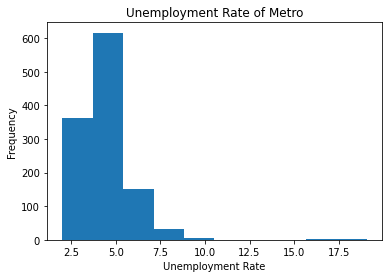

In [41]:
plt.hist(metro['unemployment_rate'])
plt.title('Unemployment Rate of Metro')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

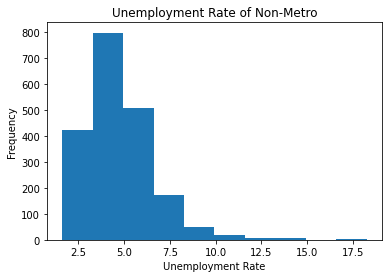

In [42]:
plt.hist(non_metro['unemployment_rate'])
plt.title('Unemployment Rate of Non-Metro')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

Both distributions are unimodal and have their mode around 4-5% of unemployment rate. 

## 6. Sampling Distribution for Difference of Means 

First, *suppose* we were to create a sampling distribution of sample mean unemployment rate differences (ie. a distribution of values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$, where $\bar{x}_{metro}$ is the mean of a random sample of $n_1=50$ metropolitan counties and $\bar{x}_{nonmetro}$ is the mean of a random sample of $n_2=50$ non-metropolitan counties).

**a)**  What would you *expect* the mean and standard deviation of this sampling distribution to be?

In [43]:
expected_mean = metro_mean - non_metro_mean
expected_std = np.sqrt((metro_std**2 + non_metro_std**2) / 50 )
print(expected_mean, expected_std)

-0.33947959525331495 0.31536805205619867


I would expect the mean and standatd deviation of this sampling distribution would be -0.3395 and 0.3154.

**b)** Would this sampling distribution of differences of sample means be approximately normal? Explain.

In [44]:
print(metro.shape[0])
print(non_metro.shape[0])

1165
1974


The samples are randomly sampled and independent. 

n1 = 50 < 10% of population number(1165), n2 = 50 < 10% of population number (1974).

n1 = n2 = 50 > 30 

Therefore, this sampling distribution meets a CLT conditions and this sampling distribution of difference of sample means is expected to be approximately normal. 

**c)**  Now, we would check your *expectations* in parts **a** and **b** above by *actually* creating a sampling distribution of differences of sample mean unemployment rates (i.e. a distribution of values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$, where $\bar{x}_{metro}$ is the mean of a random sample of $n_1=50$ metropolitan counties and $\bar{x}_{nonmetro}$ is the mean of a random sample of $n_2=50$ non-metropolitan counties).

In the space below, create this sampling distribution with 1000 values of $\bar{x}_{metro}-\bar{x}_{nonmetro}$.

In [45]:
mean_diff = []
for i in range(1000):
    sample_metro = metro.sample(50, replace = True)
    m_mean = sample_metro['unemployment_rate'].mean()
    sample_non_metro = non_metro.sample(50, replace = True)
    nm_mean = sample_non_metro['unemployment_rate'].mean()
    diff = m_mean - nm_mean
    mean_diff.append(diff)
    
sample = pd.DataFrame({'difference of sample mean' : mean_diff})

In [46]:
sample

,difference of sample mean
0,-0.2342
1,-0.2812
2,-0.5208
3,-0.1308
4,-0.5956
...,...
995,-0.5186
996,-0.7370
997,0.5920
998,-0.6758


**d)**  Calculate the mean of the simulated sampling distribution we just created.  This is an *estimate* of the mean for the sampling distribution.  Compare this to the *theoretical* sampling distribution mean that you calculated in part **a**.

In [47]:
estimate = sample['difference of sample mean'].mean()
estimate

-0.3311126

An estimate of the mean for the sampling distribution is -0.3497 and the theoretical sampling distribution mean is -0.3395. The estimate and theoretic mean is close. 

**e)** Calculate the standard deviation of the simulated sampling distribution we just created.  This is an *estimate* of the standard deviation (or standard error) for the sampling distribution.  Compare this to the *theoretical* sampling distribution standard deviation that you calculated in part **a**.

In [48]:
estimate_std = sample['difference of sample mean'].std()
estimate_std

0.32153373911088495

An estimate of the standard deviation for the sampling distribution is 0.3028 and the theoretical sampling distribution mean is 0.3154. The estimate and theoretic standard deviation is close. 

**f)** Finally, plot a histogram of this sampling distribution that you just created. Make sure that you appropriately label the x-axis, the y-axis, and the title of this plot.  Describe the shape.

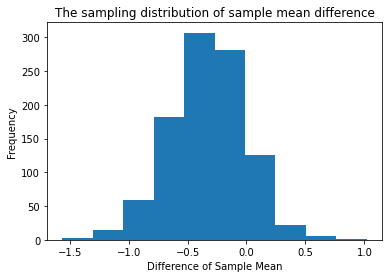

In [49]:
plt.hist(sample['difference of sample mean'])
plt.xlabel('Difference of Sample Mean')
plt.ylabel('Frequency')
plt.title('The sampling distribution of sample mean difference')
plt.show()

The shape is unimodal and nearly symmetric, nearly normally distriuted.